# KNN Regression and an OLS regression. 
Compare the two. How similar are they? Do they miss in different ways?

In [ ]:
#GitHub
pip install nbdime

In [ ]:
nbdiff notebook_1.ipynb notebook_2.ipynb

#For WEB
    #nbdiff-web notebook_1.ipynb notebook_2.ipynb

In [ ]:
nbdime config-git --enable --global
#web-base mergetool for visualizing and resolving merge conflicts, and it can be launched by calling Code
    #nbdime mergetool


In [160]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [161]:
#Need to convert XLS file to CSV import pandas as pd #Users⁩/⁨mehrunisaqayyum⁩/⁨Downloads/SVAC_2.0_complete_X.1.xlsx⁩',sheet_name=None)
#df_xls.to_csv('SVAC_2.0_complete_X.1.csv'
#df_xls2 serves as second data set for country population 
#Need to concatenate both data sets

df_xls = pd.read_excel('http://www.sexualviolencedata.org/wp-content/uploads/2019/12/SVAC_2.0_complete_X.1.xlsx',dtype='object') #encoding='utf-8')
df_xls2 = pd.read_excel('/Users/mehrunisaqayyum/Downloads/population by country.xlsx', header=1)

In [122]:
df_xls

,year,conflictid_old,conflictid_new,actor,actorid,actorid_new,actor_type,type,incomp,region,...,gwnoloc2,gwnoloc3,gwnoloc4,conflictyear,interm,postc,state_prev,ai_prev,hrw_prev,form
0,1989,6,205,Iran,630,114,1,3,1,2,...,0,0,0,0,1,0,0,0,0,-99
1,1990,6,205,Iran,630,114,1,3,1,2,...,0,0,0,1,0,0,0,0,0,-99
2,1991,6,205,Iran,630,114,1,3,1,2,...,0,0,0,0,1,0,0,0,0,-99
3,1992,6,205,Iran,630,114,1,3,1,2,...,0,0,0,0,1,0,0,0,0,-99
4,1993,6,205,Iran,630,114,1,3,1,2,...,0,0,0,1,0,0,0,0,0,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9277,2015,298,13694,Libya,620,111,1,3,1,4,...,0,0,0,1,0,0,0,0,1,7
9278,2015,13721,13721,Algeria,615,109,1,3,1,4,...,0,0,0,1,0,0,0,0,0,-99
9279,2015,13721,13721,Jund al-Khilafah,5870,5870,3,3,1,4,...,0,0,0,1,0,0,0,0,0,-99
9280,2015,13902,13902,IS,1076,234,3,3,1,2,...,0,0,0,1,0,0,0,0,0,-99


In [121]:
df_xls.loc[df_xls['location'] == 'Syria']

,year,conflictid_old,conflictid_new,actor,actorid,actorid_new,actor_type,type,incomp,region,...,gwnoloc2,gwnoloc3,gwnoloc4,conflictyear,interm,postc,state_prev,ai_prev,hrw_prev,form
2472,2015,102,299,Iran,630,114,2,4,2,2,...,0,0,0,1,0,0,0,0,0,-99
2473,2015,102,299,Russia (Soviet Union),365,57,2,4,2,2,...,0,0,0,1,0,0,0,0,0,-99
2474,2011,102,299,Syria,652,118,1,3,2,2,...,0,0,0,1,0,0,2,2,1,"1, 6, 7"
2475,2012,102,299,Syria,652,118,1,3,2,2,...,0,0,0,1,0,0,3,2,1,"1, 6, 7"
2476,2013,102,299,Syria,652,118,1,3,2,2,...,0,0,0,1,0,0,3,2,1,"1, 7"
2477,2014,102,299,Syria,652,118,1,3,2,2,...,0,0,0,1,0,0,3,2,0,"1, 7"
2478,2015,102,299,Syria,652,118,1,4,2,2,...,0,0,0,1,0,0,3,2,2,"1, 7"
2479,2011,102,299,Syrian insurgents,4456,4456,3,3,2,2,...,0,0,0,1,0,0,0,0,0,-99
2480,2012,102,299,Syrian insurgents,4456,4456,3,3,2,2,...,0,0,0,1,0,0,0,0,0,-99
2481,2013,102,299,Syrian insurgents,4456,4456,3,3,2,2,...,0,0,0,1,0,0,0,0,0,-99


## Data Cleaning

In [162]:
merged_df = pd.merge(df_xls, df_xls2, how='inner', left_on='location', right_on='location')

In [163]:
merged_df

,year,conflictid_old,conflictid_new,actor,actorid,actorid_new,actor_type,type,incomp,region,...,state_prev,ai_prev,hrw_prev,form,population,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1989,6,205,Iran,630,114,1,3,1,2,...,0,0,0,-99,76481961,NaN,NaN,NaN,NaN,NaN
1,1990,6,205,Iran,630,114,1,3,1,2,...,0,0,0,-99,76481961,NaN,NaN,NaN,NaN,NaN
2,1991,6,205,Iran,630,114,1,3,1,2,...,0,0,0,-99,76481961,NaN,NaN,NaN,NaN,NaN
3,1992,6,205,Iran,630,114,1,3,1,2,...,0,0,0,-99,76481961,NaN,NaN,NaN,NaN,NaN
4,1993,6,205,Iran,630,114,1,3,1,2,...,0,0,0,-99,76481961,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8572,2011,273,11349,ETIM,2041,1156,3,3,1,3,...,0,0,0,-99,1422971062,NaN,NaN,NaN,NaN,NaN
8573,2012,273,11349,ETIM,2041,1156,3,3,1,3,...,0,0,0,-99,1422971062,NaN,NaN,NaN,NaN,NaN
8574,2013,273,11349,ETIM,2041,1156,3,3,1,3,...,0,0,0,-99,1422971062,NaN,NaN,NaN,NaN,NaN
8575,2015,294,13646,Al-Shabaab,1578,717,3,3,1,4,...,0,0,0,-99,45519981,NaN,NaN,NaN,NaN,NaN


In [38]:
merged_df.columns

Index(['year', 'conflictid_old', 'conflictid_new', 'actor', 'actorid',
       'actorid_new', 'actor_type', 'type', 'incomp', 'region', 'location',
       'gwnoloc', 'gwnoloc2', 'gwnoloc3', 'gwnoloc4', 'conflictyear', 'interm',
       'postc', 'state_prev', 'ai_prev', 'hrw_prev', 'form', 'population',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

### Missing Values

In [77]:
#Drop -99
merged_df.isnull()

,year,conflictid_old,conflictid_new,actor,actorid,actorid_new,actor_type,type,incomp,region,...,state_prev,ai_prev,hrw_prev,form,population,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8572,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
8573,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
8574,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
8575,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True


In [79]:
for form in merged_df.columns:
    print("Unique values in column {} are: {}".format('form', merged_df['form'].unique()))

Unique values in column form are: ['-99' '1' '1, 6, 7' '1, 7' '7' '1, 2' '1, 3' '1, 2 , 7' '1, 2, 5, '
 '1, 2 ' '1, 2, 6, 7' '1, 2, 6' '1, 2, 7' '1, 5' '2' '1, 2, 3, 5, 7'
 '1, 3, 5' '2, 3' '1, 2, 3, 5' '2, 3, 5' '5, 7' '2, 5, 7' '5' '6, 7'
 '1, 2, 5' '1, 2, 5, 7' '2, 7' '1, 6' nan '3' '1, 5, 6' '1, 3, 7'
 '1, 2, 3' '1,7' '6' '1, 5, 7']
Unique values in column form are: ['-99' '1' '1, 6, 7' '1, 7' '7' '1, 2' '1, 3' '1, 2 , 7' '1, 2, 5, '
 '1, 2 ' '1, 2, 6, 7' '1, 2, 6' '1, 2, 7' '1, 5' '2' '1, 2, 3, 5, 7'
 '1, 3, 5' '2, 3' '1, 2, 3, 5' '2, 3, 5' '5, 7' '2, 5, 7' '5' '6, 7'
 '1, 2, 5' '1, 2, 5, 7' '2, 7' '1, 6' nan '3' '1, 5, 6' '1, 3, 7'
 '1, 2, 3' '1,7' '6' '1, 5, 7']
Unique values in column form are: ['-99' '1' '1, 6, 7' '1, 7' '7' '1, 2' '1, 3' '1, 2 , 7' '1, 2, 5, '
 '1, 2 ' '1, 2, 6, 7' '1, 2, 6' '1, 2, 7' '1, 5' '2' '1, 2, 3, 5, 7'
 '1, 3, 5' '2, 3' '1, 2, 3, 5' '2, 3, 5' '5, 7' '2, 5, 7' '5' '6, 7'
 '1, 2, 5' '1, 2, 5, 7' '2, 7' '1, 6' nan '3' '1, 5, 6' '1, 3, 7'
 '1, 2, 3' '1,7

In [80]:
merged_df.isnull().sum()*100/merged_df.isnull().count()

year                0.000000
conflictid_old      0.000000
conflictid_new      0.000000
actor               0.000000
actorid             0.000000
actorid_new         0.221523
actor_type          0.000000
type                0.000000
incomp              0.000000
region              0.000000
location            0.000000
gwnoloc             0.000000
gwnoloc2            0.000000
gwnoloc3            0.000000
gwnoloc4            0.000000
conflictyear        0.000000
interm              0.000000
postc               0.000000
state_prev          0.116591
ai_prev             0.116591
hrw_prev            0.116591
form                0.116591
population          0.000000
Unnamed: 2        100.000000
Unnamed: 3        100.000000
Unnamed: 4        100.000000
Unnamed: 5        100.000000
Unnamed: 6        100.000000
dtype: float64

## Sexual Violence Index Feature

In [81]:
merged_df.form.value_counts()

-99              7671
1                 566
1, 7               99
7                  69
1, 2               53
1, 2, 7            26
2                  25
1, 6, 7             7
1, 3                4
1, 2, 3, 5          4
1, 6                3
1, 2, 6             3
1, 2, 6, 7          3
1, 5                3
1, 3, 5             3
5                   2
1, 5, 7             2
2, 3                2
2, 3, 5             2
3                   2
6                   2
1, 2                2
1, 3, 7             2
1, 2 , 7            1
1, 2, 5,            1
1, 2, 3             1
1, 5, 6             1
1, 2, 5             1
2, 5, 7             1
1,7                 1
1, 2, 5, 7          1
1, 2, 3, 5, 7       1
2, 7                1
6, 7                1
5, 7                1
Name: form, dtype: int64

In [6]:
crime_counts = merged_df['form'].value_counts()
print(crime_counts)

-99              7671
1                 566
1, 7               99
7                  69
1, 2               53
1, 2, 7            26
2                  25
1, 6, 7             7
1, 3                4
1, 2, 3, 5          4
1, 6                3
1, 2, 6             3
1, 2, 6, 7          3
1, 5                3
1, 3, 5             3
5                   2
1, 5, 7             2
2, 3                2
2, 3, 5             2
3                   2
6                   2
1, 2                2
1, 3, 7             2
1, 2 , 7            1
1, 2, 5,            1
1, 2, 3             1
1, 5, 6             1
1, 2, 5             1
2, 5, 7             1
1,7                 1
1, 2, 5, 7          1
1, 2, 3, 5, 7       1
2, 7                1
6, 7                1
5, 7                1
Name: form, dtype: int64


In [90]:
##Remove (-99)
merged_df = merged_df.replace('-99', np.nan)

Unnamed: 6


In [91]:
crime_counts = merged_df['form'].value_counts()
print(crime_counts)

1                566
1, 7              99
7                 69
1, 2              53
1, 2, 7           26
2                 25
1, 6, 7            7
1, 3               4
1, 2, 3, 5         4
1, 5               3
1, 6               3
1, 2, 6            3
1, 2, 6, 7         3
1, 3, 5            3
5                  2
1, 5, 7            2
2, 3               2
2, 3, 5            2
3                  2
6                  2
1, 2               2
1, 3, 7            2
1, 2 , 7           1
1, 2, 5,           1
1, 2, 3            1
1, 5, 6            1
2, 7               1
2, 5, 7            1
1,7                1
1, 2, 5            1
1, 2, 3, 5, 7      1
6, 7               1
1, 2, 5, 7         1
5, 7               1
Name: form, dtype: int64


In [92]:
#merged_df.drop([nan], inplace = True) 
merged_df.dropna(axis=0, how= 'any', thresh=None, subset= ['form'], inplace=False)
#print(merged_df['form'])

,year,conflictid_old,conflictid_new,actor,actorid,actorid_new,actor_type,type,incomp,region,...,state_prev,ai_prev,hrw_prev,form,population,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
139,2009,143,338,Revolutionary Guard,8083,8083.0,6,3,2,2,...,1.0,0.0,0.0,1,76481961,NaN,NaN,NaN,NaN,NaN
209,1989,10,209,Civilian Armed Forces Geographical Units,8137,8137.0,6,3,2,3,...,0.0,1.0,0.0,1,98871555,NaN,NaN,NaN,NaN,NaN
211,1991,10,209,Civilian Armed Forces Geographical Units,8137,8137.0,6,3,2,3,...,0.0,1.0,0.0,1,98871555,NaN,NaN,NaN,NaN,NaN
213,1993,10,209,Civilian Armed Forces Geographical Units,8137,8137.0,6,3,2,3,...,0.0,1.0,0.0,1,98871555,NaN,NaN,NaN,NaN,NaN
347,1989,10,209,Philippines,840,154.0,1,3,2,3,...,0.0,1.0,0.0,"1, 6, 7",98871555,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8554,2011,271,11346,NTC,2011,1126.0,3,3,2,4,...,0.0,1.0,0.0,7,6320360,NaN,NaN,NaN,NaN,NaN
8555,2012,271,11346,NTC,2011,1126.0,3,3,2,4,...,0.0,1.0,0.0,"1, 7",6320360,NaN,NaN,NaN,NaN,NaN
8561,2015,298,13694,IS,1076,234.0,3,3,1,4,...,0.0,1.0,1.0,2,6320360,NaN,NaN,NaN,NaN,NaN
8562,2015,298,13694,Libya,620,111.0,1,3,1,4,...,0.0,0.0,1.0,7,6320360,NaN,NaN,NaN,NaN,NaN


### Get Dummies
Note: We want to count the number of sexual violence crimes, and call this 'crime_counts', which is derived from the 'form' column. We will use 'crime_counts' to track occurrences of crime to contribute to Sexual Violence Index. 

In [93]:
merged_df.form.value_counts()

1                566
1, 7              99
7                 69
1, 2              53
1, 2, 7           26
2                 25
1, 6, 7            7
1, 3               4
1, 2, 3, 5         4
1, 5               3
1, 6               3
1, 2, 6            3
1, 2, 6, 7         3
1, 3, 5            3
5                  2
1, 5, 7            2
2, 3               2
2, 3, 5            2
3                  2
6                  2
1, 2               2
1, 3, 7            2
1, 2 , 7           1
1, 2, 5,           1
1, 2, 3            1
1, 5, 6            1
2, 7               1
2, 5, 7            1
1,7                1
1, 2, 5            1
1, 2, 3, 5, 7      1
6, 7               1
1, 2, 5, 7         1
5, 7               1
Name: form, dtype: int64

In [95]:
crime_counts = merged_df['form']
print(crime_counts)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8572    NaN
8573    NaN
8574    NaN
8575    NaN
8576      6
Name: form, Length: 8577, dtype: object


In [ ]:
def crime_counts (code_number):
    code_number = (code_number)
    dict_of_crimes = {}
    for item in code_number:
        if code_number == '1':
            dict_of_crimes['type 1'] = 1
        if code_number == '2':
            dict_of_crimes['type 2'] = 1
        if code_number == '3':
            dict_of_crimes['type 3'] = 1
        if code_number == '4':
            dict_of_crimes['type 4'] = 1
        if code_number == '5':
            dict_of_crimes['type 5'] = 1
        if code_number == '6':
            dict_of_crimes['type 6'] = 1
        if code_number == '7':
            dict_of_crimes['type 7'] = 1
        if code_number == '1,7':
            dict_of_crimes['type 8'] = 2
        if code_number == '':
            dict_of_crimes[''] = 2

In [100]:
for i in range(0, len(merged_df.form)):
    if pd.isnull(merged_df.form[i]):
        merged_df.form[i] = merged_df.form[i+1]
        
# one-hot encoding the 'crime_counts' variable: 
pd.get_dummies(merged_df["form"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,1,"1, 2","1, 2","1, 2 , 7","1, 2, 3","1, 2, 3, 5","1, 2, 3, 5, 7","1, 2, 5","1, 2, 5,","1, 2, 5, 7",...,"2, 3","2, 3, 5","2, 5, 7","2, 7",3,5,"5, 7",6,"6, 7",7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8574,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [117]:
# append dummies to 'Merged' dataframe and rename 'sexviolence-df'
sexviolence_df = pd.concat([merged_df, pd.get_dummies(merged_df["form"])], axis=1)
sexviolence_df.head(-1500)

,year,conflictid_old,conflictid_new,actor,actorid,actorid_new,actor_type,type,incomp,region,...,"2, 3","2, 3, 5","2, 5, 7","2, 7",3,5,"5, 7",6,"6, 7",7
0,1989,6,205,Iran,630,114.0,1,3,1,2,...,0,0,0,0,0,0,0,0,0,0
1,1990,6,205,Iran,630,114.0,1,3,1,2,...,0,0,0,0,0,0,0,0,0,0
2,1991,6,205,Iran,630,114.0,1,3,1,2,...,0,0,0,0,0,0,0,0,0,0
3,1992,6,205,Iran,630,114.0,1,3,1,2,...,0,0,0,0,0,0,0,0,0,0
4,1993,6,205,Iran,630,114.0,1,3,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7072,1992,187,382,Civil Defense Forces/Kamajor/Donso/Gbethis/Kapras,8024,8024.0,6,4,2,4,...,0,0,0,0,0,0,0,0,0,0
7073,1993,187,382,Civil Defense Forces/Kamajor/Donso/Gbethis/Kapras,8024,8024.0,6,4,2,4,...,0,0,0,0,0,0,0,0,0,0
7074,1994,187,382,Civil Defense Forces/Kamajor/Donso/Gbethis/Kapras,8024,8024.0,6,4,2,4,...,0,0,0,0,0,0,0,0,0,0
7075,1995,187,382,Civil Defense Forces/Kamajor/Donso/Gbethis/Kapras,8024,8024.0,6,4,2,4,...,0,0,0,0,0,0,0,0,0,0


In [102]:
merged_df.columns

Index(['year', 'conflictid_old', 'conflictid_new', 'actor', 'actorid',
       'actorid_new', 'actor_type', 'type', 'incomp', 'region', 'location',
       'gwnoloc', 'gwnoloc2', 'gwnoloc3', 'gwnoloc4', 'conflictyear', 'interm',
       'postc', 'state_prev', 'ai_prev', 'hrw_prev', 'form', 'population',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

##NOTE: 5/3: Used initial to convert to string to numberic, but don't need to if I create 'For Loop' and Use 'Dummies'
    #df_xls['form'] = pd.to_numeric(df_xls['form'], errors='coerce')
    #print(merged_df)


### find most common value for an attribute


In [ ]:
#???def majority(attributes, data, target):
    #find target attribute
    valFreq = {}
    #find target in data
    index = attributes.index(target)
    #calculate frequency of values in target attr
    for tuple in data:
        if (valFreq.has_key(tuple[index])):
            valFreq[tuple[index]] += 1 
        else:
            valFreq[tuple[index]] = 1
    max = 0
    major = ""
    for key in valFreq.keys():
        if valFreq[key]>max:
            max = valFreq[key]
            major = key
    return major

In [22]:
merged_df.apply(lambda x: type(x)).value_counts()

<class 'pandas.core.series.Series'>    28
dtype: int64

In [23]:
merged_df['form'].apply(lambda x: type(x)).value_counts()

<class 'str'>      8567
<class 'float'>      10
Name: form, dtype: int64

def show_me_problematic_rows(row):
    if isinstance(row, str) or isinstance(row, Object):
        print(row)
        
merged_df['form'].head(100).apply(show_me_problematic_rows)

Remove Comma After Counting

In [ ]:
merged_df = merged_df.replace(',', '')

## Data Exploration

In [125]:
sexviolence_df.columns

Index(['year', 'conflictid_old', 'conflictid_new', 'actor', 'actorid',
       'actorid_new', 'actor_type', 'type', 'incomp', 'region', 'location',
       'gwnoloc', 'gwnoloc2', 'gwnoloc3', 'gwnoloc4', 'conflictyear', 'interm',
       'postc', 'state_prev', 'ai_prev', 'hrw_prev', 'form', 'population',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       '1', '1, 2', '1, 2 ', '1, 2 , 7', '1, 2, 3', '1, 2, 3, 5',
       '1, 2, 3, 5, 7', '1, 2, 5', '1, 2, 5, ', '1, 2, 5, 7', '1, 2, 6',
       '1, 2, 6, 7', '1, 2, 7', '1, 3', '1, 3, 5', '1, 3, 7', '1, 5',
       '1, 5, 6', '1, 5, 7', '1, 6', '1, 6, 7', '1, 7', '1,7', '2', '2, 3',
       '2, 3, 5', '2, 5, 7', '2, 7', '3', '5', '5, 7', '6', '6, 7', '7'],
      dtype='object')

In [124]:
sexviolence_df.loc[merged_df['location'] == 'Syria']

,year,conflictid_old,conflictid_new,actor,actorid,actorid_new,actor_type,type,incomp,region,...,"2, 3","2, 3, 5","2, 5, 7","2, 7",3,5,"5, 7",6,"6, 7",7
3521,2015,102,299,Iran,630,114.0,2,4,2,2,...,0,0,0,0,0,0,0,0,0,0
3522,2015,102,299,Russia (Soviet Union),365,57.0,2,4,2,2,...,0,0,0,0,0,0,0,0,0,0
3523,2011,102,299,Syria,652,118.0,1,3,2,2,...,0,0,0,0,0,0,0,0,0,0
3524,2012,102,299,Syria,652,118.0,1,3,2,2,...,0,0,0,0,0,0,0,0,0,0
3525,2013,102,299,Syria,652,118.0,1,3,2,2,...,0,0,0,0,0,0,0,0,0,0
3526,2014,102,299,Syria,652,118.0,1,3,2,2,...,0,0,0,0,0,0,0,0,0,0
3527,2015,102,299,Syria,652,118.0,1,4,2,2,...,0,0,0,0,0,0,0,0,0,0
3528,2011,102,299,Syrian insurgents,4456,4456.0,3,3,2,2,...,0,0,0,0,0,0,0,0,0,0
3529,2012,102,299,Syrian insurgents,4456,4456.0,3,3,2,2,...,0,0,0,0,0,0,0,0,0,0
3530,2013,102,299,Syrian insurgents,4456,4456.0,3,3,2,2,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_xls.describe(include='all')
#10 records missing for sexual violence related columns, like 'state_prev' and 'form'.

,year,conflictid_old,conflictid_new,actor,actorid,actorid_new,actor_type,type,incomp,region,...,gwnoloc2,gwnoloc3,gwnoloc4,conflictyear,interm,postc,state_prev,ai_prev,hrw_prev,form
count,9282,9282,9282,9282,9282,9263,9282,9282,9282,9282,...,9282,9282,9282,9282,9282,9282,9272,9272,9272,9272
unique,27,168,167,712,693,691,6,3,3,5,...,11,2,2,2,2,2,5,5,5,35
top,2015,137,333,India,750,141,3,3,2,3,...,0,0,0,1,0,0,0,0,0,-99
freq,431,819,819,223,223,223,3020,5468,5839,3305,...,8954,9258,9258,5140,8538,5886,8293,8613,7740,8329


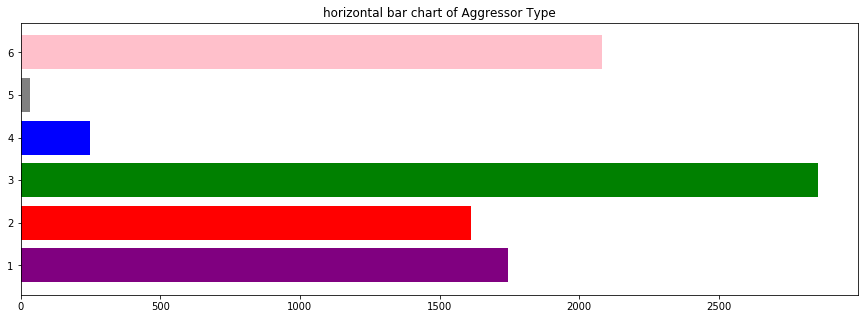

In [49]:
plt.figure(figsize=(15,5))
plt.barh(merged_df.groupby("actor_type")["actor_type"].count().index, 
        merged_df.groupby("actor_type")["actor_type"].count(), 
        color=["purple","red","green","blue","grey","pink"])
plt.title("horizontal bar chart of Aggressor Type")

plt.show()

In [ ]:
#Just for Syria rows
plt.figure(figsize=(15,5))
plt.barh(merged_df.groupby("actor_type")["actor_type"].count().index, 
        merged_df.groupby("actor_type")["actor_type"].count(), 
        color=["purple","red","green","blue","grey","pink"])
plt.title("horizontal bar chart of grades")

plt.show()

In [58]:
merged_df.corr()

,population,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
population,1.0,NaN,NaN,NaN,NaN,NaN
Unnamed: 2,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 5,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 6,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
merged_df.groupby("location").mean()

,population,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
location,,,,,,
Afghanistan,32269589,NaN,NaN,NaN,NaN,NaN
Algeria,38140133,NaN,NaN,NaN,NaN,NaN
Angola,26015781,NaN,NaN,NaN,NaN,NaN
Azerbaijan,9385468,NaN,NaN,NaN,NaN,NaN
Bangladesh,152761418,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
United States of America,316400538,NaN,NaN,NaN,NaN,NaN
Uzbekistan,29932631,NaN,NaN,NaN,NaN,NaN
Venezuela,29871040,NaN,NaN,NaN,NaN,NaN


In [75]:
# create crosstab: location by form
count_table = pd.crosstab(merged_df["location"], merged_df["form"])
count_table

form,-99,1,"1, 2","1, 2","1, 2 , 7","1, 2, 3","1, 2, 3, 5","1, 2, 3, 5, 7","1, 2, 5","1, 2, 5,",...,"2, 3","2, 3, 5","2, 5, 7","2, 7",3,5,"5, 7",6,"6, 7",7
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,796,15,3,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4
Algeria,147,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
Angola,127,17,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Azerbaijan,73,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bangladesh,48,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States of America,287,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Uzbekistan,29,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Venezuela,9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


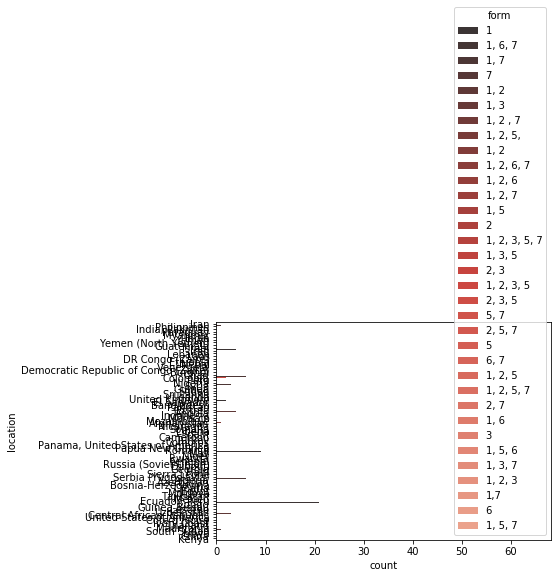

In [130]:
# Plot counts for each combination of form.
sns.countplot(y="location", hue="form", data=merged_df, palette="Reds_d")
plt.show()

### Heatmap

In [62]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# make the correlation matrices.
corrmat_global = merged_df.corr()

corrmat_Syria = merged_df.corr(('actor_type','location','form')

# heatmaps are a great way to get 
# a quick visual read on a big correlation matrix.

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
# draw the heatmap using seaborn.
sns.heatmap(corrmat_global, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Global)")

plt.subplot(1,2,2)
# draw the heatmap using seaborn.
sns.heatmap(corrmat_Syria, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Syria)")

plt.show()

SyntaxError: invalid syntax (<ipython-input-62-7f1c3dfdfdf1>, line 12)

In [63]:
crimes = sns.load_dataset("merged_df")
crimes = flights.pivot("actor_type", "year", "location")
ax = sns.heatmap(merged_df)

HTTPError: HTTP Error 404: Not Found

## Feature Engineering

In [ ]:
#??
merged_df['sex_violence'] = ((merged_df['state_prev']+ merged_df['ai_prev']+ merged_df['hrw_prev']) * merged_df['crime_fixed_another_way'])/ merged_df['population']
print(merged_df['sex_violence'])

# KNN

In [164]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import neighbors
from sklearn import svm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
#Reshape


In [172]:

# Target is the form of sexually violent crime based on features, like 'actor_type'
# Build our model. 
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
#X = merged_df['actor_type']
X = np.arange.reshape(merged_df['actor_type'])
Y = merged_df['form']
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

AttributeError: 'builtin_function_or_method' object has no attribute 'reshape'

In [156]:
#Train and Test Splitting of Data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state = 42)

NameError: name 'y' is not defined

In [157]:
#Feature Scaling
# Applying standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

NameError: name 'X_train' is not defined

# OLS Model

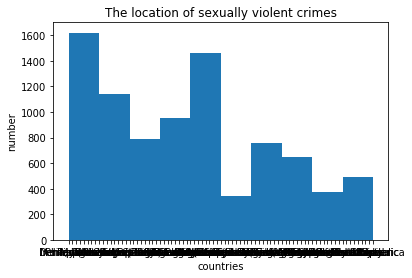

In [146]:
plt.hist(merged_df.location)
plt.title("The location of sexually violent crimes")
plt.xlabel("countries")
plt.ylabel("number")
plt.show()

#Target variable Not normally distributed

In [143]:
import statsmodels.api as sm
from sklearn import linear_model

# Y is the target variable
Y = merged_df['form']
# X is the feature set which includes

X = merged_df[['actor_type','type']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)
# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

ValueError: Input contains NaN